## Question 1: Cholesky and Gauss Siedel

In [1]:
import numpy as np # for printing matrix and vectors only for comparisons
from tabulate import tabulate # for printing matrix and vectors

In [2]:
def read_matrix_vector(filename):
    """Read the matrix and vector from a text file."""
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    # Read the matrix
    matrix = []
    for line in lines[:-1]:  # Read until the second last line (the vector)
        matrix.append([float(val) for val in line.strip().split()])
    
    # Read the vector
    vector = [float(val) for val in lines[-1].strip().split()]

    return matrix, vector

In [3]:
filename = 'q1_input.txt'
A, b = read_matrix_vector(filename)
    
print("Matrix:")
print(tabulate(A, tablefmt='fancy_grid'))
print("\nVector:")
print(tabulate([b], tablefmt='fancy_grid'))

Matrix:
╒════╤════╤════╤════╤════╤════╕
│  4 │ -1 │  0 │ -1 │  0 │  0 │
├────┼────┼────┼────┼────┼────┤
│ -1 │  4 │ -1 │  0 │ -1 │  0 │
├────┼────┼────┼────┼────┼────┤
│  0 │ -1 │  4 │  0 │  0 │ -1 │
├────┼────┼────┼────┼────┼────┤
│ -1 │  0 │  0 │  4 │ -1 │  0 │
├────┼────┼────┼────┼────┼────┤
│  0 │ -1 │  0 │ -1 │  4 │ -1 │
├────┼────┼────┼────┼────┼────┤
│  0 │  0 │ -1 │  0 │ -1 │  4 │
╘════╧════╧════╧════╧════╧════╛

Vector:
╒═══╤═══╤═══╤═══╤═══╤═══╕
│ 2 │ 1 │ 2 │ 2 │ 1 │ 2 │
╘═══╧═══╧═══╧═══╧═══╧═══╛


In [4]:
def cholesky_decomposition(mat):
    """Perform Cholesky decomposition of a symmetric positive-definite matrix."""
    n = len(mat)
    L = np.zeros((n, n))

    for i in range(n):
        for j in range(i + 1):
            if i == j:
                L[i][i] = np.sqrt(mat[i][i] - sum(L[i][k] ** 2 for k in range(i)))
            else:
                L[i][j] = (mat[i][j] - sum(L[i][k] * L[j][k] for k in range(j))) / L[j][j]

    return L

L_cholesky = cholesky_decomposition(A)

print("\nL (Cholesky decomposition):")
print(tabulate(L_cholesky, tablefmt='fancy_grid'))


L (Cholesky decomposition):
╒══════╤═══════════╤════════════╤═════════════╤══════════╤════════╕
│  2   │  0        │  0         │  0          │  0       │ 0      │
├──────┼───────────┼────────────┼─────────────┼──────────┼────────┤
│ -0.5 │  1.93649  │  0         │  0          │  0       │ 0      │
├──────┼───────────┼────────────┼─────────────┼──────────┼────────┤
│  0   │ -0.516398 │  1.93218   │  0          │  0       │ 0      │
├──────┼───────────┼────────────┼─────────────┼──────────┼────────┤
│ -0.5 │ -0.129099 │ -0.0345033 │  1.93188    │  0       │ 0      │
├──────┼───────────┼────────────┼─────────────┼──────────┼────────┤
│  0   │ -0.516398 │ -0.138013  │ -0.554605   │  1.84572 │ 0      │
├──────┼───────────┼────────────┼─────────────┼──────────┼────────┤
│  0   │  0        │ -0.517549  │ -0.00924342 │ -0.58327 │ 1.8417 │
╘══════╧═══════════╧════════════╧═════════════╧══════════╧════════╛


In [5]:
def solve_system_cholesky_decomposition(A, b):
    """Solve a system of linear equations Ax = b using Cholesky decomposition."""
    L = cholesky_decomposition(A)
    y = forward_substitution(L, b)
    x = backward_substitution(L.T, y)
    return x

def forward_substitution(L, b):
    """Perform forward substitution to solve Ly = b."""
    n = len(b)
    y = np.zeros(n)

    for i in range(n):
        y[i] = (b[i] - np.dot(L[i,:i], y[:i])) / L[i,i]

    return y

def backward_substitution(U, y):
    """Perform backward substitution to solve Ux = y."""
    n = len(y)
    x = np.zeros(n)

    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.dot(U[i,i+1:], x[i+1:])) / U[i,i]

    return x

solution_cholesky = solve_system_cholesky_decomposition(A, b)
solution_numpy = np.linalg.solve(A, b)

data = [
    ["Solution using Cholesky decomposition"] + list(solution_cholesky),
    ["Solution using NumPy's solver"] + list(solution_numpy)
]

print("\nSolutions:")
print(tabulate(data, headers=["Method", "x1", "x2", "x3", "x4", "x5", "x6"], tablefmt="fancy_grid"))


Solutions:
╒═══════════════════════════════════════╤══════╤══════╤══════╤══════╤══════╤══════╕
│ Method                                │   x1 │   x2 │   x3 │   x4 │   x5 │   x6 │
╞═══════════════════════════════════════╪══════╪══════╪══════╪══════╪══════╪══════╡
│ Solution using Cholesky decomposition │    1 │    1 │    1 │    1 │    1 │    1 │
├───────────────────────────────────────┼──────┼──────┼──────┼──────┼──────┼──────┤
│ Solution using NumPy's solver         │    1 │    1 │    1 │    1 │    1 │    1 │
╘═══════════════════════════════════════╧══════╧══════╧══════╧══════╧══════╧══════╛


In [6]:
def dot_product(v1, v2):
    """Calculate the dot product of two vectors."""
    return sum(x * y for x, y in zip(v1, v2))

def truncate_number(number, decimal_places, round_off=False):
    """
    Truncate a number with or without rounding off.

    Args:
    number: The number to truncate.
    decimal_places: Number of decimal places to keep.
    round_off: Whether to round off or not. Default is True.

    Returns:
    truncated_number: Truncated number with or without rounding off.
    """
    factor = 10 ** decimal_places
    if round_off:
        truncated_number = round(number * factor) / factor
    else:
        truncated_number = int(number * factor) / factor
    return truncated_number

def gauss_seidel_iteration(A, b, x0, tol=1e-6, max_iter=1000):
    """Solve the system of linear equations Ax = b using Gauss-Seidel iterative method."""
    n = len(A)
    x = x0[:]
    convergence_table = []
    for iter_count in range(max_iter):
        for i in range(n):
            x[i] = (b[i] - dot_product(A[i][:i], x[:i]) - dot_product(A[i][i + 1:], x[i + 1:])) / A[i][i]
        convergence_table.append([iter_count + 1, x[:]])
        if max(abs(x[i] - x0[i]) for i in range(n)) < tol:
            break
        x0[:] = x
    return x, convergence_table

def solve_system_gauss_seidel(A, b, tol=1e-6, max_iter=1000, print_convergence=False, prescribed_tol=False):
    """Solve the system of linear equations Ax = b with prescribed precision using Gauss-Seidel method."""
    if prescribed_tol:
        tol = prescribed_tol
    x0 = [0] * len(b)  # Initial guess
    x, convergence_table = gauss_seidel_iteration(A, b, x0, tol=tol, max_iter=max_iter)
    
    # Truncate the solution values without rounding off
    truncated_convergence_table = []
    for iteration, solution in convergence_table:
        truncated_solution = [truncate_number(val, 6, round_off=False) for val in solution]
        truncated_convergence_table.append([iteration, truncated_solution])
    
    if print_convergence:
        print(tabulate(truncated_convergence_table, headers=["Iteration", "Solution"], tablefmt="fancy_grid"))
    return x

In [7]:
# linear equations Ax = b with prescribed precision
solution = solve_system_gauss_seidel(A, b, print_convergence=True)

╒═════════════╤══════════════════════════════════════════════════════════════╕
│   Iteration │ Solution                                                     │
╞═════════════╪══════════════════════════════════════════════════════════════╡
│           1 │ [0.5, 0.375, 0.59375, 0.625, 0.5, 0.773437]                  │
├─────────────┼──────────────────────────────────────────────────────────────┤
│           2 │ [0.75, 0.710937, 0.871093, 0.8125, 0.824218, 0.923828]       │
├─────────────┼──────────────────────────────────────────────────────────────┤
│           3 │ [0.880859, 0.894042, 0.954467, 0.926269, 0.936035, 0.972625] │
├─────────────┼──────────────────────────────────────────────────────────────┤
│           4 │ [0.955078, 0.961395, 0.983505, 0.972778, 0.976699, 0.990051] │
├─────────────┼──────────────────────────────────────────────────────────────┤
│           5 │ [0.983543, 0.985937, 0.993997, 0.99006, 0.991512, 0.996377]  │
├─────────────┼─────────────────────────────────────

## Question 2: Gauss Jordan and LU factorization

In [8]:
filename = 'q2_input.txt'
A, b = read_matrix_vector(filename)
    
print("Matrix:")
print(tabulate(A, tablefmt='fancy_grid'))
print("\nVector:")
print(tabulate([b], tablefmt='fancy_grid'))

Matrix:
╒════╤═══╤═══╤════╤════╕
│  0 │ 4 │ 2 │  0 │  1 │
├────┼───┼───┼────┼────┤
│  4 │ 0 │ 4 │ 10 │  1 │
├────┼───┼───┼────┼────┤
│  2 │ 5 │ 1 │  3 │ 13 │
├────┼───┼───┼────┼────┤
│ 11 │ 3 │ 0 │  1 │  2 │
├────┼───┼───┼────┼────┤
│  3 │ 2 │ 7 │  1 │  0 │
╘════╧═══╧═══╧════╧════╛

Vector:
╒═══╤════╤════╤════╤═══╕
│ 0 │ 15 │ 92 │ 51 │ 1 │
╘═══╧════╧════╧════╧═══╛


In [9]:
def gauss_jordan_solve(mat, b, precision=6):
    """Solve a system of linear equations using Gauss-Jordan elimination."""
    n = len(mat)
    augmented_mat = [row + [bi] for row, bi in zip(mat, b)]

    for i in range(n):
        # Partial pivoting
        max_row = max(range(i, n), key=lambda k: abs(augmented_mat[k][i]))
        augmented_mat[i], augmented_mat[max_row] = augmented_mat[max_row], augmented_mat[i]

        # Division of pivot row
        pivot = augmented_mat[i][i]
        for j in range(i, n + 1):
            augmented_mat[i][j] /= pivot

        # Elimination loop
        for k in range(n):
            if k != i:
                factor = augmented_mat[k][i]
                for j in range(i, n + 1):
                    augmented_mat[k][j] -= factor * augmented_mat[i][j]

    solution = [truncate_number(row[n], precision) for row in augmented_mat]

    return solution

In [10]:
solution_gauss_jordan = gauss_jordan_solve(A, b)
solution_numpy = np.linalg.solve(A, b)
data = [
    ["Solution using Cholesky decomposition"] + list(solution_gauss_jordan),
    ["Solution using NumPy's solver"] + list(solution_numpy)
]

print("\nSolutions:")
print(tabulate(data, headers=["Method", "x1", "x2", "x3", "x4", "x5", "x6"], tablefmt="fancy_grid"))


Solutions:
╒═══════════════════════════════════════╤═════════╤══════════╤═════════╤═══════════╤═════════╕
│ Method                                │      x1 │       x2 │      x3 │        x4 │      x5 │
╞═══════════════════════════════════════╪═════════╪══════════╪═════════╪═══════════╪═════════╡
│ Solution using Cholesky decomposition │ 3.70806 │ -1.26088 │ -1.0463 │ -0.278316 │ 7.13612 │
├───────────────────────────────────────┼─────────┼──────────┼─────────┼───────────┼─────────┤
│ Solution using NumPy's solver         │ 3.70807 │ -1.26088 │ -1.0463 │ -0.278316 │ 7.13612 │
╘═══════════════════════════════════════╧═════════╧══════════╧═════════╧═══════════╧═════════╛


## Question 3: Conjugate Gradient 

In [11]:
from fractions import Fraction

def read_matrix_vector(filename):
    """Read the matrix and vector from a text file."""
    with open(filename, 'r') as file:
        lines = file.readlines()
    
    matrix = []
    for line in lines[:-1]: 
        line = line.strip().replace('−', '-')  # Replace problematic character
        matrix.append([float(val) for val in line.split()])
    
    vector = [Fraction(val) for val in lines[-1].strip().split()]  # Convert to fractions
    
    return np.array(matrix), np.array(vector, dtype=np.float64)

filename = 'q3_input.txt'
A, b = read_matrix_vector(filename)
    
print("Matrix:")
print(tabulate(A, tablefmt='fancy_grid'))
print("\nVector:")
print(tabulate([b], tablefmt='fancy_grid'))

Matrix:
╒════╤════╤════╤════╤════╤════╕
│  2 │ -3 │  0 │  0 │  0 │  0 │
├────┼────┼────┼────┼────┼────┤
│ -1 │  4 │ -1 │  0 │ -1 │  0 │
├────┼────┼────┼────┼────┼────┤
│  0 │ -1 │  4 │  0 │  0 │ -1 │
├────┼────┼────┼────┼────┼────┤
│  0 │  0 │  0 │  2 │ -3 │  0 │
├────┼────┼────┼────┼────┼────┤
│  0 │ -1 │  0 │ -1 │  4 │ -1 │
├────┼────┼────┼────┼────┼────┤
│  0 │  0 │ -1 │  0 │ -1 │  4 │
╘════╧════╧════╧════╧════╧════╛

Vector:
╒══════════╤══════════╤═══╤══════════╤═══════════╤═════════╕
│ -1.66667 │ 0.666667 │ 3 │ -1.33333 │ -0.333333 │ 1.66667 │
╘══════════╧══════════╧═══╧══════════╧═══════════╧═════════╛


In [12]:
def conjugate_gradient(A, b, precision):
    n = len(b)
    x = np.zeros(n)  # Initial guess for the solution
    r = b - np.dot(A, x)  # Initial residual
    p = r  # Initial search direction

    while np.linalg.norm(r) > precision:
        Ap = np.dot(A, p)
        alpha = np.dot(r, r) / np.dot(p, Ap)
        x = x + alpha * p
        r_next = r - alpha * Ap
        beta = np.dot(r_next, r_next) / np.dot(r, r)
        p = r_next + beta * p
        r = r_next

    return x

# Define matrix A and vector b
A = np.array([[4, -1, 0],
              [-1, 4, -1],
              [0, -1, 3]])
b = np.array([5, -7, 3])
precision = 1e-6

# Solve using NumPy's built-in solver
numpy_solution = np.linalg.solve(A, b)

# Solve using conjugate gradient method
cg_solution = conjugate_gradient(A, b, precision)

# Prepare data for tabulation
data = [["NumPy Solver"] + list(numpy_solution),
        ["Conjugate Gradient Method"] + list(cg_solution)]

# Print the solutions using tabulate
print(tabulate(data, headers=["Method", "x1", "x2", "x3"], tablefmt="fancy_grid"))

╒═══════════════════════════╤══════════╤══════════╤══════════╕
│ Method                    │       x1 │       x2 │       x3 │
╞═══════════════════════════╪══════════╪══════════╪══════════╡
│ NumPy Solver              │ 0.902439 │ -1.39024 │ 0.536585 │
├───────────────────────────┼──────────┼──────────┼──────────┤
│ Conjugate Gradient Method │ 0.902439 │ -1.39024 │ 0.536585 │
╘═══════════════════════════╧══════════╧══════════╧══════════╛


## Question 4: Matrix inverison on a fly

In [13]:
import matplotlib.pyplot as plt
from scipy.sparse import diags
from helper_modules import *

In [14]:
def rhs_2d(X, Y):
    """
    Computes the right-hand side of the Poisson equation in the domain 
    [0, 1]x[-0.5, 0.5]:
    b = (np.sin(np.pi * X) * np.cos(np.pi * Y) +
     np.sin(5.0 * np.pi * X) * np.cos(5.0 * np.pi * Y))
    
    Parameters
    ----------
    X : numpy.ndarray
        array of x coordinates for all grid points
    Y : numpy.ndarray
        array of x coordinates for all grid points

    Returns
    -------
    rhs : numpy.ndarray
        exact solution of the Poisson equation
    """
    
    rhs = (np.sin(np.pi * X) * np.cos(np.pi * Y) +
     np.sin(5.0 * np.pi * X) * np.cos(5.0 * np.pi * Y))
    
    return rhs

def p_exact_2d(X, Y):
    """
    Computes the exact solution of the Poisson equation in the domain 
    [0, 1]x[-0.5, 0.5] with rhs:
    b = (np.sin(np.pi * X) * np.cos(np.pi * Y) +
     np.sin(5.0 * np.pi * X) * np.cos(5.0 * np.pi * Y))
    
    Parameters
    ----------
    X : numpy.ndarray
        array of x coordinates for all grid points
    Y : numpy.ndarray
        array of x coordinates for all grid points

    Returns
    -------
    sol : numpy.ndarray
        exact solution of the Poisson equation
    """
    
    sol = ( -1.0 / (2.0*np.pi**2) * np.sin(np.pi * X) * np.cos(np.pi * Y) + 
     -1.0 / (50.0*np.pi**2) * np.sin(5.0 * np.pi * X) * np.cos(5.0 * np.pi * Y) )
    
    return sol

In [15]:
# Grid parameters.
nx = 101                  # number of points in the x direction
ny = 101                  # number of points in the y direction
xmin, xmax = 0.0, 1.0     # limits in the x direction
ymin, ymax = -0.5, 0.5    # limits in the y direction
lx = xmax - xmin          # domain length in the x direction
ly = ymax - ymin          # domain length in the y direction
dx = lx / (nx - 1)        # grid spacing in the x direction
dy = ly / (ny - 1)        # grid spacing in the y direction


x = np.linspace(xmin, xmax, nx)
y = np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(x, y, indexing='ij')

b = rhs_2d(X, Y)
p_exact = p_exact_2d(X, Y)

In [16]:
def A(v, dx, dy, m =0.2):
    """
    Computes the action of (-) the Poisson operator on any
    vector v_{ij} for the interior grid nodes
    
    Parameters
    ----------
    v : numpy.ndarray
        input vector
    dx : float
         grid spacing in the x direction
    dy : float
        grid spacing in the y direction
        

    Returns
    -------
    Av : numpy.ndarray
        action of A on v
    """
    
    Av = 1/2*((v[:-2, 1:-1]-2.0*v[1:-1, 1:-1]+v[2:, 1:-1])/dx**2) + m**2*v[1:-1,1:-1]
    
    return Av

In [17]:
# Initial guess
p0 = np.zeros((nx, ny))

# Place holders for the residual r and A(d)
r = np.zeros((nx, ny))
Ad = np.zeros((nx, ny))

In [18]:
tolerance = 1e-6
max_it = 100

it = 0  # iteration counter
tol_hist_jac = []

p = p0.copy()

# Initial residual r0 and initial search direction d0
r[1:-1, 1:-1] = -b[1:-1, 1:-1] - A(p, dx, dy)
d = r.copy()

while it < max_it:
    # Laplacian of the search direction.
    Ad[1:-1, 1:-1] = A(d, dx, dy)
    # Magnitude of jump.
    alpha = np.sum(r * r) / np.sum(d * Ad)
    # Iterated solution
    pnew = p + alpha * d
    # Update the residual.
    r = r - alpha * Ad
    # Compute beta
    beta = np.sum(r * r) / np.sum(r * r)
    # Update the search direction.
    d = r + beta * d

    # Calculate l2_norm of the difference
    diff = l2_diff(pnew, p)
    tol_hist_jac.append(diff)

    # Get ready for the next iteration
    it += 1
    np.copyto(p, pnew)

    # Check for convergence
    if diff < tolerance:
        print(f'\nThe solution converged after {it} iterations')
        break


The solution converged after 4 iterations


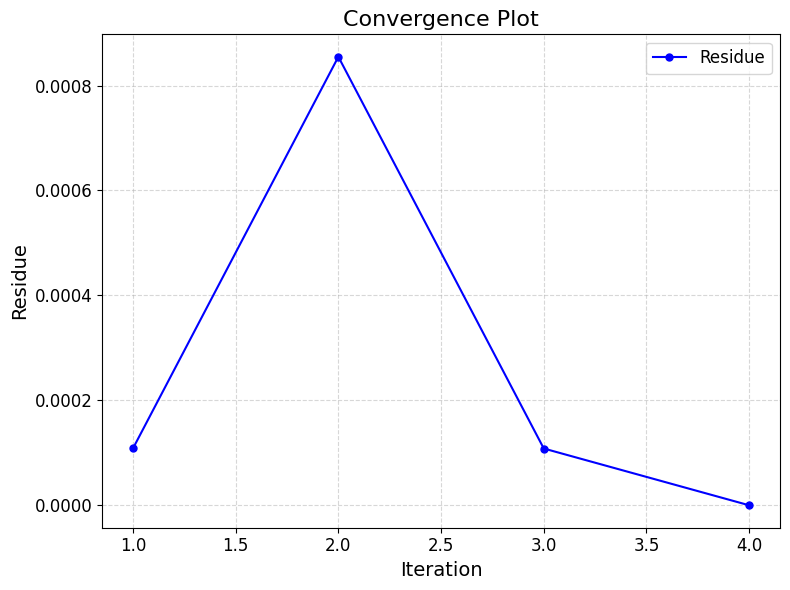

In [19]:
# Plot residue versus iteration steps
plt.figure(figsize=(8, 6))
plt.plot(range(1, it + 1), tol_hist_jac, color='b', linestyle='-', marker='o', markersize=5, label='Residue')
plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Residue', fontsize=14)
plt.title('Convergence Plot', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [20]:
diff = l2_diff(pnew, p_exact)
print(f'The l2 difference between the computed solution '
      f'and the exact solution is:\n{diff}')

The l2 difference between the computed solution and the exact solution is:
0.0012623805569629532


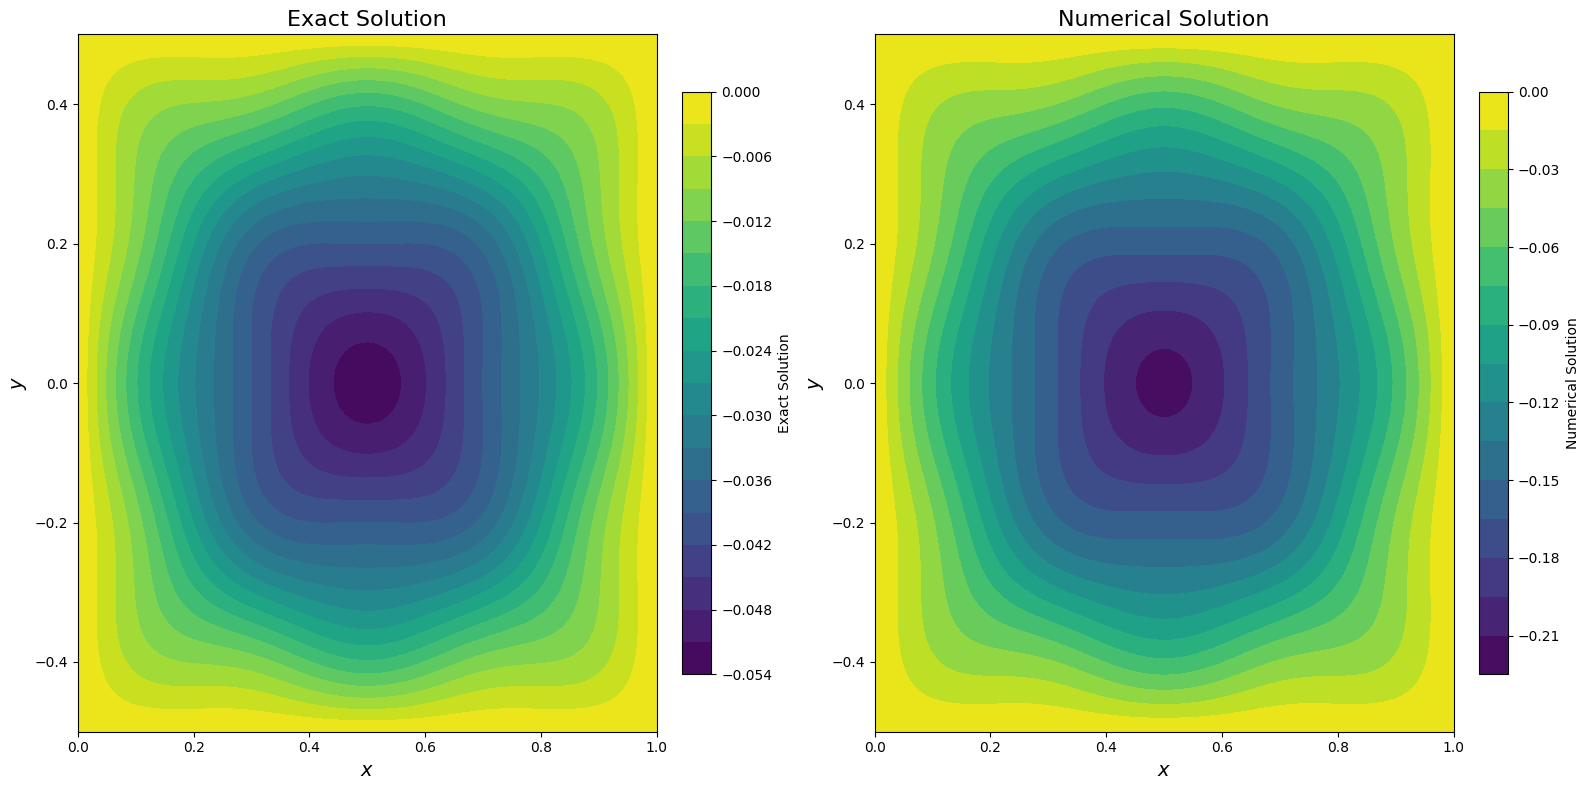

In [21]:
fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(16, 8))

contour_1 = ax_1.contourf(X, Y, p_exact, 20, cmap='viridis')
fig.colorbar(contour_1, ax=ax_1, label='Exact Solution', fraction=0.046, pad=0.04)
ax_1.set_xlabel(r'$x$', fontsize=14)
ax_1.set_ylabel(r'$y$', fontsize=14)
ax_1.set_title('Exact Solution', fontsize=16)

contour_2 = ax_2.contourf(X, Y, -pnew, 20, cmap='viridis')
fig.colorbar(contour_2, ax=ax_2, label='Numerical Solution', fraction=0.046, pad=0.04)
ax_2.set_xlabel(r'$x$', fontsize=14)
ax_2.set_ylabel(r'$y$', fontsize=14)
ax_2.set_title('Numerical Solution', fontsize=16)

plt.tight_layout()
plt.show()